In [ ]:
%run data_cleaning.py

In [ ]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = df_cleaned

In [8]:
df.dtypes
numerical_columns = [col for col in df.columns if col != "Tumor Size"]

In [10]:
from sklearn.preprocessing import RobustScaler

# Apllying RobustScaler to scale orginal numerical features
df[numerical_columns] = RobustScaler().fit_transform(df[numerical_columns])
df.head()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,0.866667,-1.0,0.0,-0.5,1.0,0.0,0.727273,0.0,0.0,0.352941,-0.500000,-0.413793,0.0
1,-0.333333,0.0,1.0,0.5,0.0,0.0,0.500000,0.0,0.0,-0.294118,1.000000,-0.344828,0.0
2,0.200000,1.0,2.0,1.5,0.0,0.0,1.909091,0.0,0.0,-0.294118,1.090909,0.137931,0.0
3,0.200000,-1.0,0.0,-0.5,1.0,0.0,-0.363636,0.0,0.0,0.058824,-0.500000,0.482759,0.0
4,-0.533333,0.0,0.0,0.0,1.0,0.0,0.818182,0.0,0.0,0.705882,-0.500000,-0.793103,0.0


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.drop(["Tumor Size (mm)", "T Stage", "6th Stage"], axis=1)
y = df["Tumor Size (mm)"]

In [8]:
from sklearn.model_selection import train_test_split #splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
np.random.seed(42)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [10]:
mae

0.6502424624012999

In [11]:
mse

0.7078138964579264

In [12]:
r2

0.04049233671582586

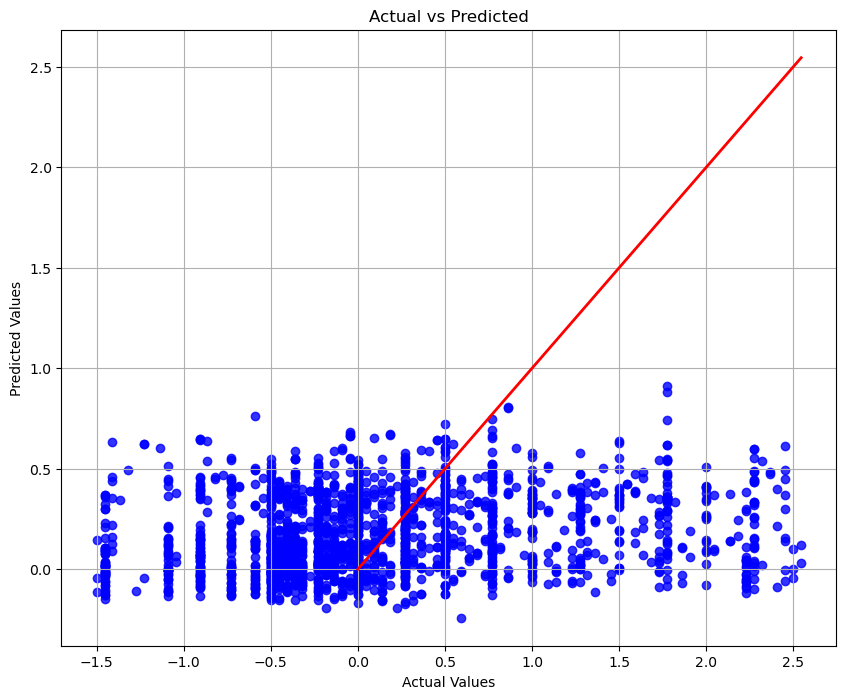

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [14]:
coefficients = model.coef_

# Print coefficients along with corresponding feature names
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Age: -0.08336764319655386
N Stage: 0.1454157954071883
Grade: 0.05955277958648251
A Stage: -0.21369280602724683
Estrogen Status: 0.13919994180172737
Progesterone Status: -0.15845447787272965
Regional Node Examined: -0.021027650904341957
Regional Node Positive: 0.15171002278777146
Survival Months: -0.024900204840970098
Status: -0.008036122472311396


In [15]:
X = df[["Age", "N Stage", "A Stage", "Progesterone Status", "Regional Node Positive", "Estrogen Status"]]
y  = df["Tumor Size (mm)"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [17]:
mae

0.6498667300548269

In [18]:
mse

0.7067993555688449

In [19]:
r2

0.04186764138653143

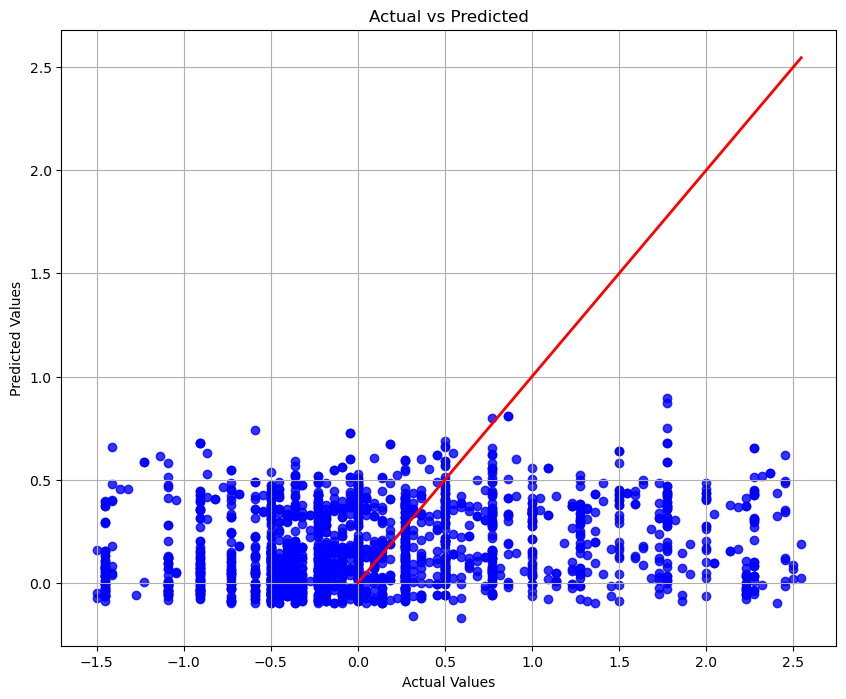

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer

In [23]:
lasso = Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10.0]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring = scorer, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)

predictions = best_lasso.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [24]:
mae

0.6498475711139241

In [25]:
mse

0.7067779372123788

In [26]:
r2

0.04189667596365254

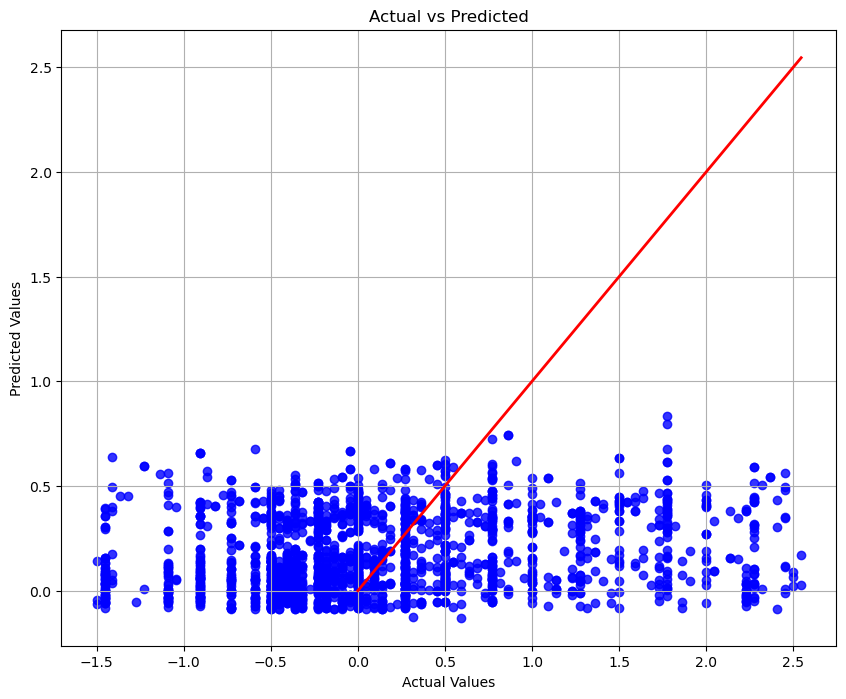

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [31]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
predictions = best_elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [32]:
mae

0.6498398721036371

In [33]:
mse

0.7067857722155425

In [34]:
r2

0.04188605488710262

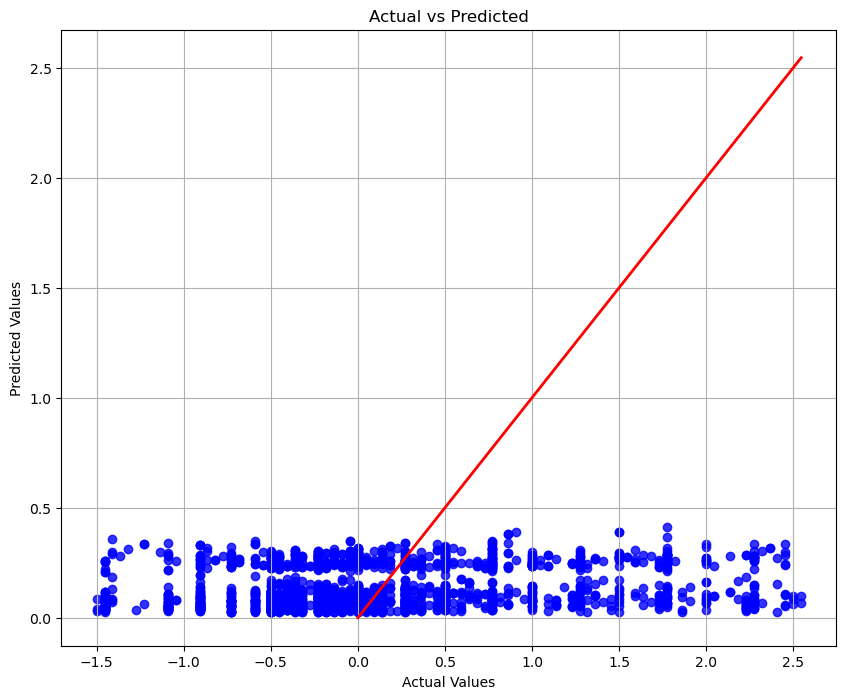

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()